In [1]:
# from PCA_demo.py:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
from scipy import linalg
from scipy.spatial.distance import cdist
from sklearn.utils.graph_shortest_path import graph_shortest_path

def proceed():
        import sys
        x = input('to continue enter 3: ')
        if(x == "3"):
            pass
        else:
            print('\nProcess terminated by user\n')
            sys.exit(0)

# Adjacency Matrix

In [2]:
def adjacency_matrix(data, dist_func="epsilon", epsilon=1):
    N, M = data.shape
    distance = cdist(data.T, data.T, metric=dist_func)
    adjacency =  np.zeros((M, M)) + np.inf
    less_than_epsilon = distance < epsilon
    adjacency[less_than_epsilon] = distance[less_than_epsilon]
    short_dist = graph_shortest_path(adjacency)
    return short_dist

# ISOMAP

In [3]:
def isomap(dist_matrix, dim=2):

    N, M = dist_matrix.shape
    diag_array = np.eye(M) - (1/M)*np.ones((M, M))
    dist_matrix = dist_matrix**2
    C = -1/(2*M) * diag_array.dot(dist_matrix).dot(diag_array)
    eigen_values, eigen_vects = linalg.eig(C)
    index = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[index ]
    eigen_values = eigen_values[:dim] 
    eigen_vects = eigen_vects[:, index ]
    eigen_vects = eigen_vects[:, :dim]
    Z = (eigen_vects.dot(np.diag(eigen_values**(-1/2)))).real
    return Z

# Scatterplot and Images

In [4]:
def plot_graph(reduced_matrix, image_array, title="Face Distances", filename="faces.png"):

    N, M = image_array.shape
    print('N, M: ', N, ' ', M, '\n')
    proceed()
    figure1 = plt.figure()
    figure1.set_size_inches(10, 10)
    figure1 = figure1.add_subplot(111)
    figure1.set_title(title)
    figure1.set_xlabel('Component: 1')
    figure1.set_ylabel('Component: 2')


    rangex= (max(reduced_matrix[:, 0]) - min(reduced_matrix[:, 0])) * 0.1
    rangey = (max(reduced_matrix[:, 1]) - min(reduced_matrix[:, 1])) * 0.1

    for i in range(40):
        img_num = np.random.randint(0, M)
        x0 = reduced_matrix[img_num, 0] - (rangex/2)
        x1 = reduced_matrix[img_num, 0] + (rangex/2)
        y0 = reduced_matrix[img_num, 1] - (rangey/2)
        y1 = reduced_matrix[img_num, 1] + (rangey/2)
        img = image_array[:, img_num].reshape(64, 64).T
        figure1.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))


    figure1.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], marker='.',alpha=0.7)
    figure1.set_ylabel('Direction 1')
    figure1.set_xlabel('Direction 2')
    print("SEAN HERE", figure1)
    display(figure1)
    plt.show(figure1)
    
    return None




3. Order of faces using ISOMAP


reading file as .mat: 
type(m):  <class 'numpy.ndarray'>
m.shape:  (4096, 698) 

to continue enter 3: 3
--------------------------------------------------3A--------------------------------------------------
Adj_matrix:
  (698, 698) 

3a) Adj_matrix:
  [[ 0.         61.03137046  6.74323967 ... 39.85343883 62.49785768
  26.2558373 ]
 [61.03137046  0.         64.36033515 ... 22.92304977 55.11152462
  54.99413899]
 [ 6.74323967 64.36033515  0.         ... 44.38349594 60.75417936
  25.00274763]
 ...
 [39.85343883 22.92304977 44.38349594 ...  0.         51.01502474
  34.72362778]
 [62.49785768 55.11152462 60.75417936 ... 51.01502474  0.
  48.5255165 ]
 [26.2558373  54.99413899 25.00274763 ... 34.72362778 48.5255165
   0.        ]] 


to continue enter 3: 3
--------------------------------------------------3B--------------------------------------------------
z.shape:  (698, 2) 

z:  [[ 0.00156036 -0.00017263]
 [-0.00144146  0.00094479]
 [ 0.001594   -0.0009

<AxesSubplot:title={'center':'ISOMAP'}, xlabel='Direction 2', ylabel='Direction 1'>

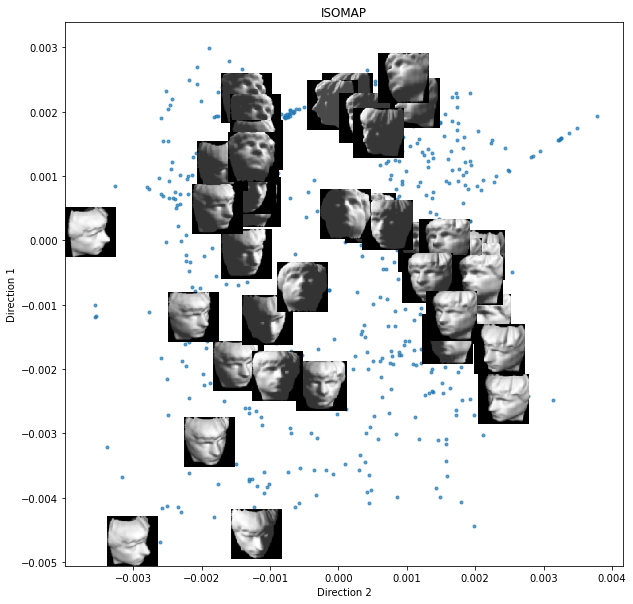




PCA
--------



N, M:  4096   698 

to continue enter 3: 3
SEAN HERE AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:title={'center':'PCA'}, xlabel='Direction 2', ylabel='Direction 1'>

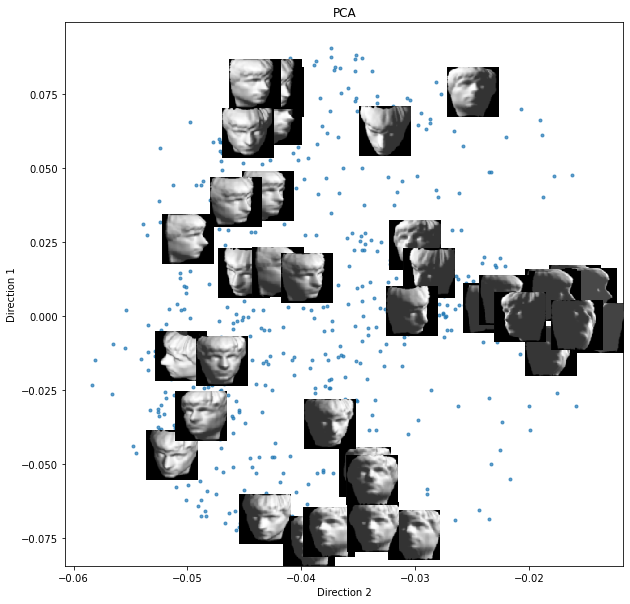

In [5]:
def main():
    
    print('\n\n\n3. Order of faces using ISOMAP\n\n')
    
    print('reading file as .mat: ')
    imageVectorsMat = spio.loadmat('isomap.mat')
    m = imageVectorsMat['images']
    print('type(m): ', type(m))
    print('m.shape: ', m.shape, '\n')
    proceed()
    
   # D = make_adjacency(m, epsilson=350, dist_func="cityblock")
    #D = make_adjacency(df, epsilon=350, dist_func="euclidean")
    print("--------------------------------------------------3A--------------------------------------------------")
    Adj_matrix = adjacency_matrix(m, epsilon=10, dist_func="euclidean")
    print('Adj_matrix:\n ', Adj_matrix.shape, '\n')
    print('3a) Adj_matrix:\n ', Adj_matrix, '\n\n')
    proceed()
    
    print("--------------------------------------------------3B--------------------------------------------------")
    z = isomap(Adj_matrix)
    print('z.shape: ', z.shape, '\n')
    print('z: ', z, '\n\n')
    proceed()
    
    print("--------------------------------------------------3C/B--------------------------------------------------")
    plot_graph(z, image_array=m, title="ISOMAP")
    print("\n\n")

    #---
    ## PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    z = pca.fit(m)
    print("PCA\n--------\n")
    print("\n")
    plot_graph(z.components_.T, image_array=m, title="PCA", 
            filename="pca_faces.png")

    
main()

### 3a) The adjacency matrix comes out as a (698, 698) matrix with values < epsilon

### 3b) Similar to the paper and lectures, the ISOMAP organized the faces depending on the face direction. Faces looking to the right are on the left side of the graph, faces looking left are on the right side of the graph, and faces looking straight are in the middle of the graph. 

### 3c/d) PCA ordered the faces based on contrast of white to dark (similar to how PCA did on question 2), as opposed to direction of the faces that ISOMAP used. Each method has its own uses, so it depends on which features you are looking to identify. 